In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [137]:
# Code starts here
df=pd.read_csv("train.csv")
df.head()
# Code ends here.

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


In [138]:
df.shape

(1070, 9)

In [139]:
df.isnull().sum()

Id                0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [140]:
df['insuranceclaim'].value_counts()

1    608
0    462
Name: insuranceclaim, dtype: int64

In [141]:
df['insuranceclaim'].value_counts()/len(df)

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   charges         1070 non-null   float64
 8   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 75.4 KB


In [143]:
df.drop('Id',axis=1,inplace=True)

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

In [144]:
# Code starts here
categorical=df[["sex","children","smoker","region","insuranceclaim"]]
continuous=df[["age","bmi","charges",]]

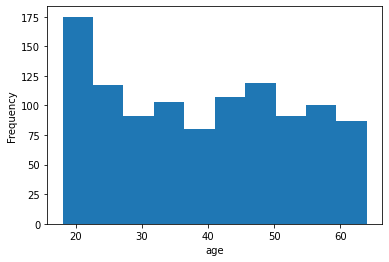

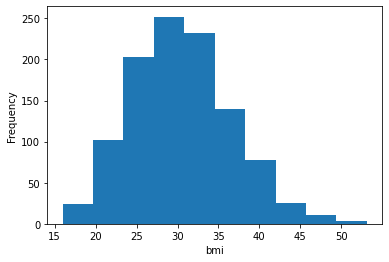

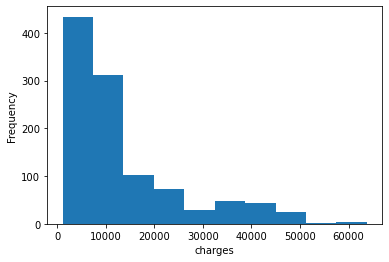

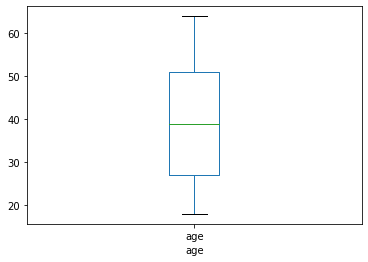

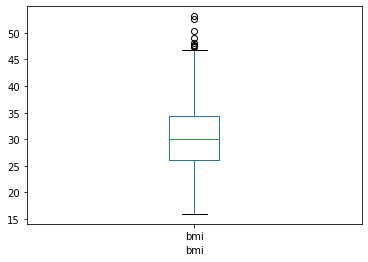

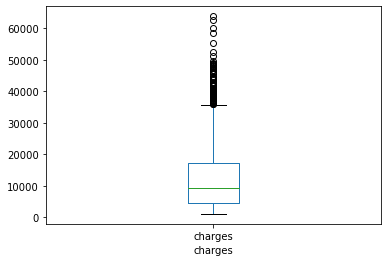

In [145]:
# to visualize distributions of the column(s) by plotting them.
import matplotlib.pyplot as plt    
def plot_distribution(kind_,df,col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to plot the distribution
    """
    for i in col:    
        df[i].plot(kind=kind_)
        plt.xlabel(i)
        plt.show()
plot_distribution("hist",df,["age","bmi","charges"])
plot_distribution("box",df,["age","bmi","charges"])



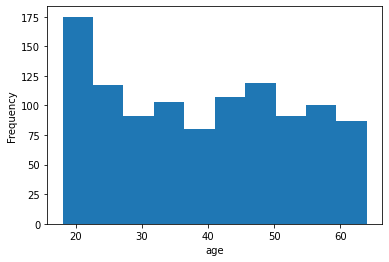

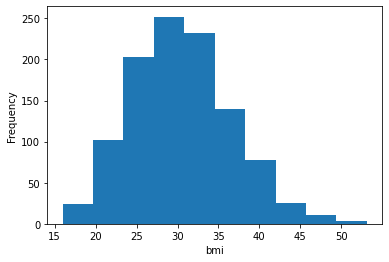

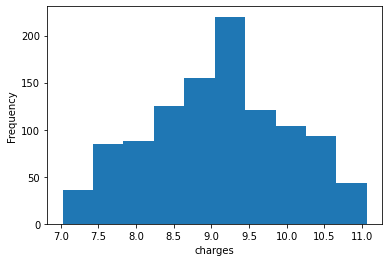

In [146]:
def log(df,col):
    lst = []
    for i in df[col]:
        if i < 0:
            #temp = np.sqrt(abs(i))
            lst.append(-np.log(abs(i)))
        else:
            #temp = np.sqrt(i)
            lst.append(np.log(i))
    df.loc[:,col] = lst
log(df,'charges')
plot_distribution("hist",df,["age","bmi","charges"])

q_value:  41.052249999999994


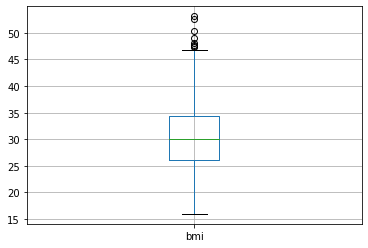

In [147]:
df.boxplot(column=['bmi'])

q_value = df['bmi'].quantile(0.95)
print("q_value: ", q_value)


relation: 
                      age       sex       bmi  children    smoker    region  \
age             1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400   
sex            -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674   
bmi             0.091499  0.047436  1.000000  0.033350  0.005660  0.158037   
children        0.061800  0.032628  0.033350  1.000000  0.021243  0.027956   
smoker         -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970   
region          0.006400  0.018674  0.158037  0.027956  0.006970  1.000000   
charges         0.541497  0.007588  0.126360  0.181336  0.660347 -0.037733   
insuranceclaim  0.083923  0.022043  0.366515 -0.386124  0.342564  0.014917   

                 charges  insuranceclaim  
age             0.541497        0.083923  
sex             0.007588        0.022043  
bmi             0.126360        0.366515  
children        0.181336       -0.386124  
smoker          0.660347        0.342564  
region         -0.037733   

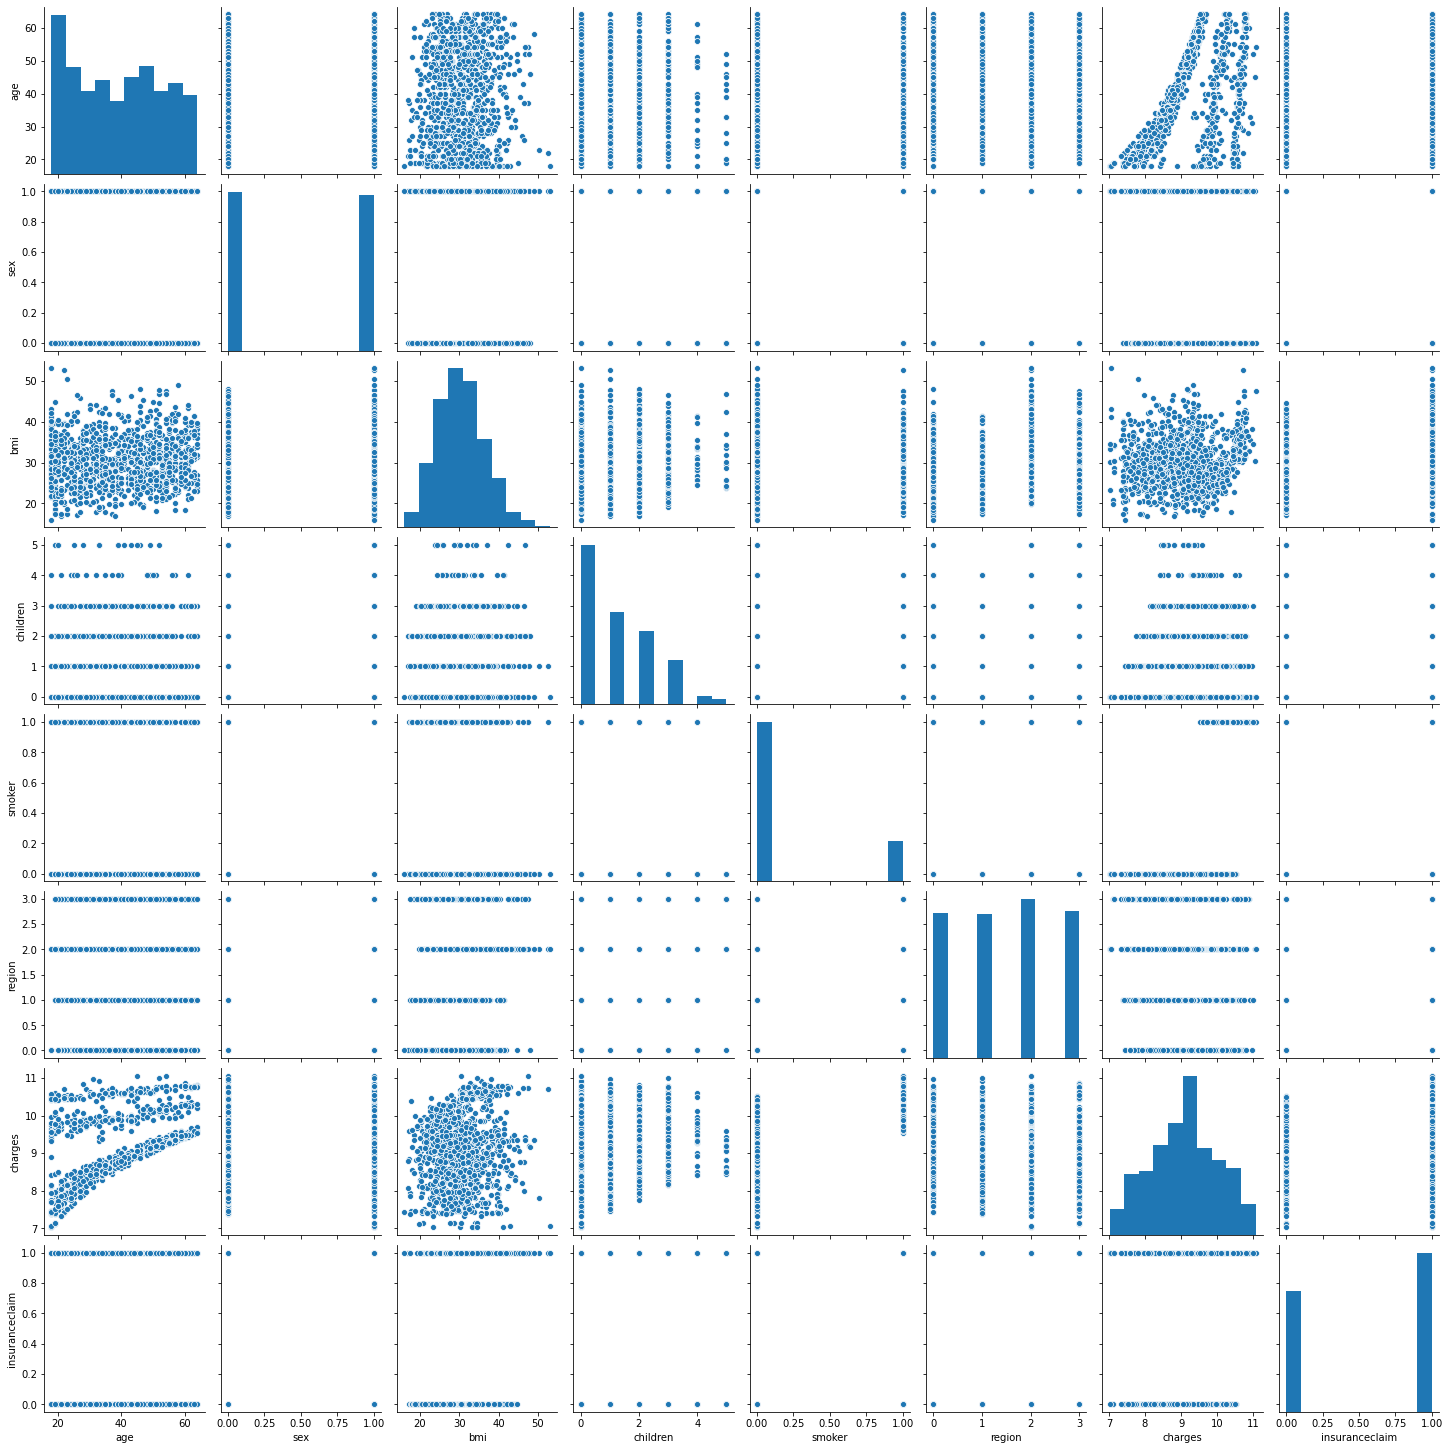

In [148]:

relation = df.corr()
print("relation: \n", relation)
sns.pairplot(df)

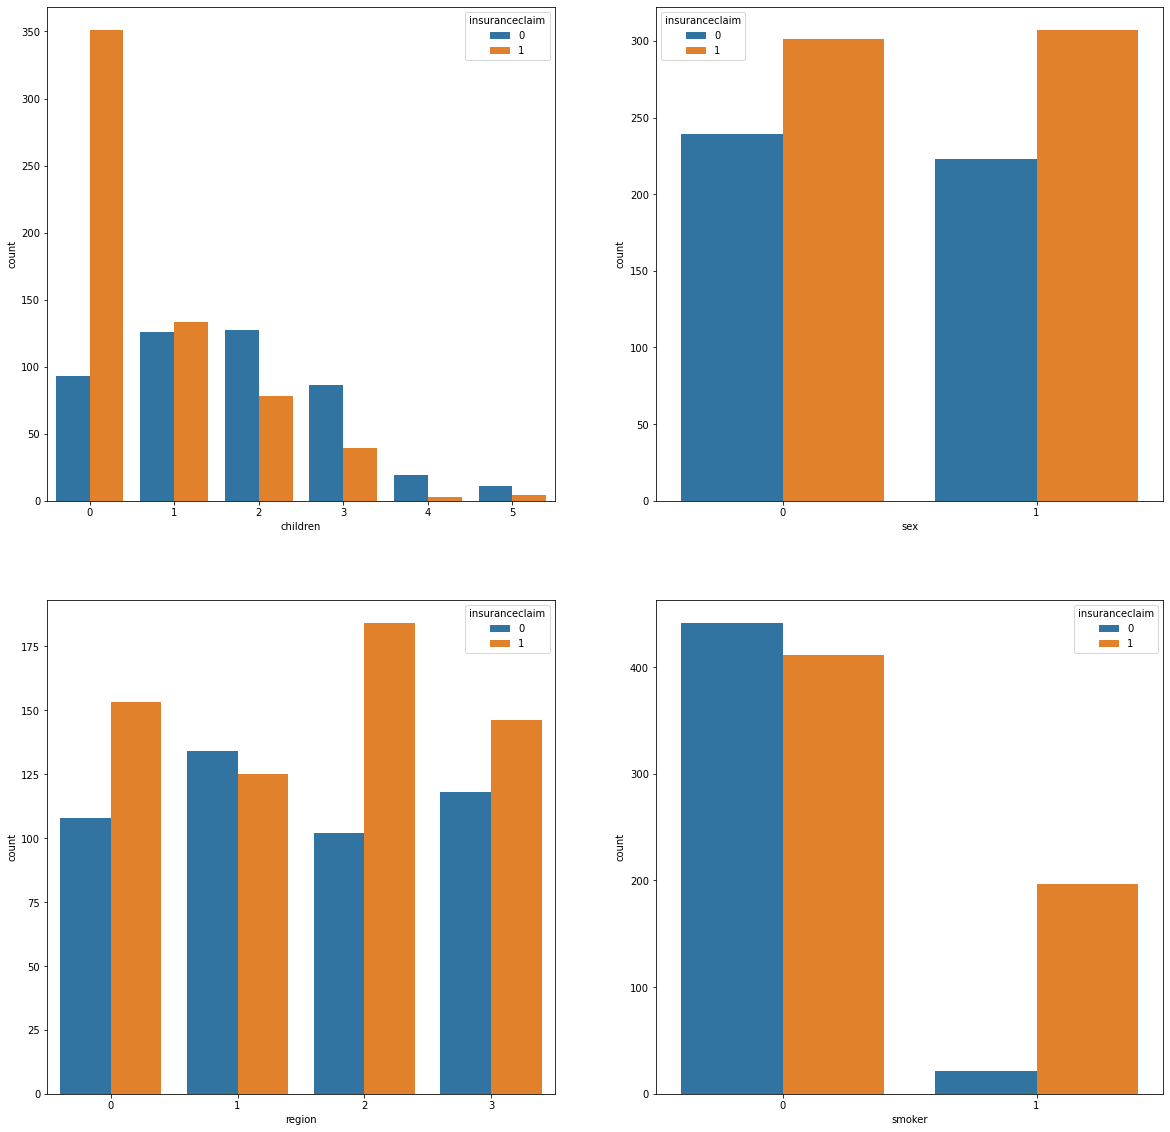

In [149]:
cols = ['children','sex','region','smoker']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20,20))
for i in range(2):
    for j in range(2):
        col = cols[ i * 2 + j]
        sns.countplot(x = df[col], hue = df['insuranceclaim'], ax = axes[i,j])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [150]:
# Code starts here
X=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Code ends here.

In [151]:
parameters = {'C':[0.1,0.5,1,5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator = lr, param_grid = parameters)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9018691588785047

roc_auc:  0.9241979916466719


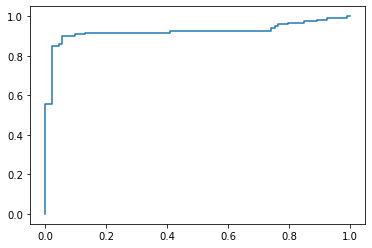

In [152]:
score = roc_auc_score(y_pred, y_test)
y_pred_proba = grid.predict_proba(X_test)[:,1]
fpr, tpr, th = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc: ",roc_auc)

plt.plot(fpr, tpr, label="Logistic model, auc= "+str(roc_auc))
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [153]:
# Code starts here
df_test=pd.read_csv("test.csv")
df_test.isnull().sum()
#df_test.shape

# Code ends here.

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [154]:
Id=df_test['Id']

In [155]:
df_test.drop('Id',axis=1,inplace=True)

In [156]:
log(df_test,'charges')


In [157]:
final_pred = grid.predict(df_test)
final_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [158]:
submission = pd.DataFrame({'Id':Id, 'insuranceclaim': final_pred})
submission.to_csv('1st_submission.csv', index = False)